In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'D:\GLCA\PROJECT\python\Python_Amazon_Sales_Analysis-main\Python_Amazon_Sales_Analysis-main/Amazon Sale Report.csv',encoding='unicode_escape')

In [6]:
df.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN


In [7]:
df.shape

(128976, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [12]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [15]:
(df.isnull().sum()/df.shape[0])*100

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by           69.557902
New                   100.000000
PendingS              100.000000
dtype: float64

In [16]:
df.drop(['New','PendingS'],axis=1,inplace=True)

In [40]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [19]:
df.shape

(128976, 19)

In [21]:
df.currency.unique()

array(['INR', nan], dtype=object)

In [23]:
df.dropna(subset=['currency','Amount'],inplace=True)

In [36]:
df["fulfilled-by"].unique()

array(['Easy Ship'], dtype=object)

In [39]:
df.dropna(inplace=True)

In [42]:
df.shape

(121143, 19)

In [43]:
df.columns 

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [44]:
df['ship-postal-code']=df['ship-postal-code'].astype(int)

In [45]:
df['ship-postal-code'].dtype

dtype('int32')

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,121143.000000,121143,121143.000000,121143.000000,121143.000000
mean,64486.312655,2022-05-12 12:11:22.182214144,0.961252,648.576874,463623.724507
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32294.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64477.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,96682.500000,2022-06-04 00:00:00,1.000000,788.000000,600020.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37220.415404,NaN,0.214276,281.196896,191301.588170


In [60]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143
unique,112861,12,2,1,2,9,11,3,1,8697,68,1,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,77589,83629,121143,82713,47038,20965,109458,121143,10675,21084,121143,121143


# Exploratory Data Analysis

In [61]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

## SIZE

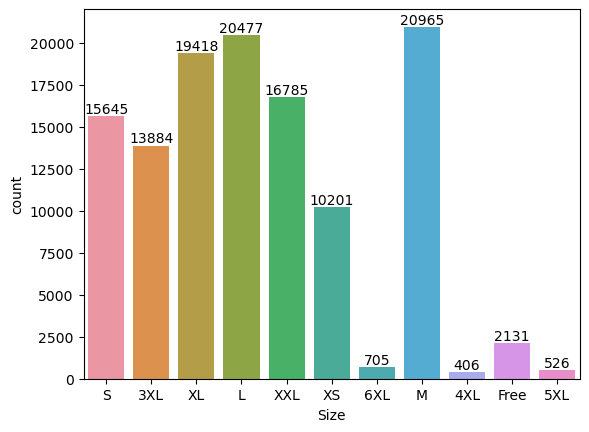

In [65]:
ax=sns.countplot(data=df,x='Size')

for bar in ax.containers:
     ax.bar_label(bar)

Note:- from the above graph we get to know that most people buy M-size. 

In [67]:
S_Qty=df.groupby(['Size'],as_index=False).agg({'Qty':"sum"}).sort_values(by="Qty",ascending=False)

<Axes: xlabel='Size', ylabel='Qty'>

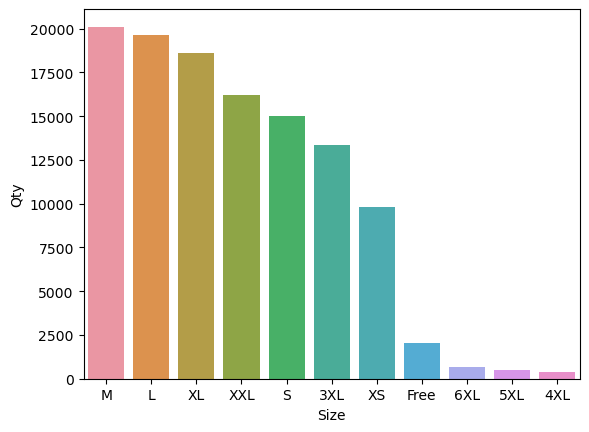

In [68]:
sns.barplot(x="Size",y="Qty",data=S_Qty)

Note:- From the above graph we get to know that most M-size quantity is sold. 

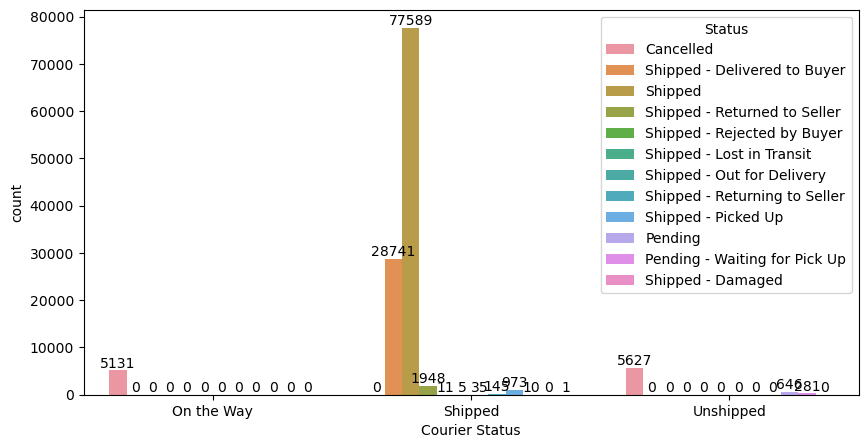

In [77]:
plt.figure(figsize=(10,5))
a1=sns.countplot(x='Courier Status',data=df,hue='Status')

for bar in a1.containers:
    a1.bar_label(bar)

 Note:-from the above graph we get to konw that 77589 orders are shipped

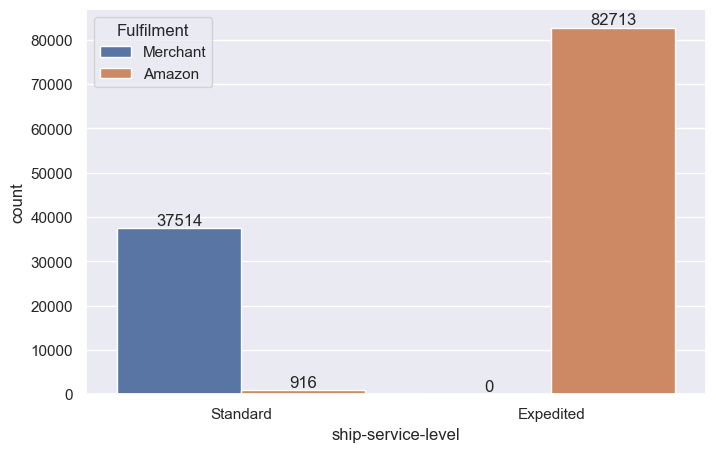

In [140]:
sns.set(rc={'figure.figsize':(8,5)})

a2=sns.countplot(x='ship-service-level',data=df,hue='Fulfilment')
for bar in a2.containers:
    a2.bar_label(bar)

From the above graph we say that most of the orders are shipped by Amazon Expedited Mode.

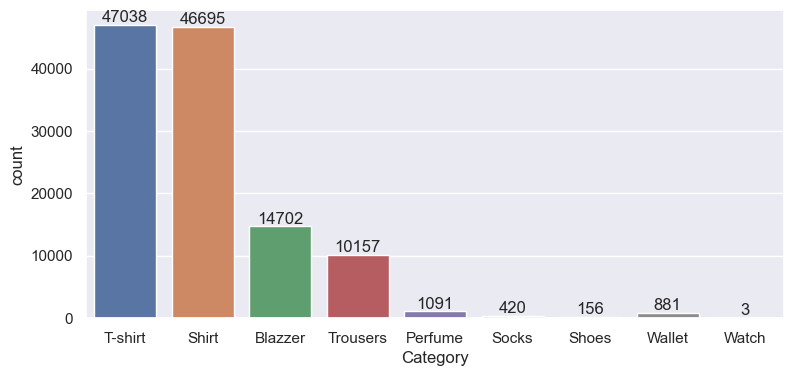

In [182]:
v=sns.countplot(x="Category",data=df)
for bar in v.containers:
    v.bar_label(bar)

From the above graph we see that most of the people are buying T-shirt.

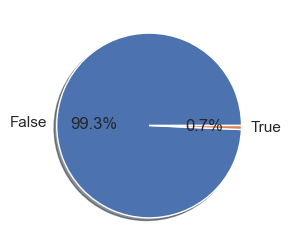

In [155]:
plt.figure(figsize=(3,3))
plt.pie(df.B2B.value_counts(),autopct='%0.1f%%',
       labels=["False","True"],shadow=True)
plt.show()

From the above graph  we say that 0.7% are B2B buyers and rest are retailers.

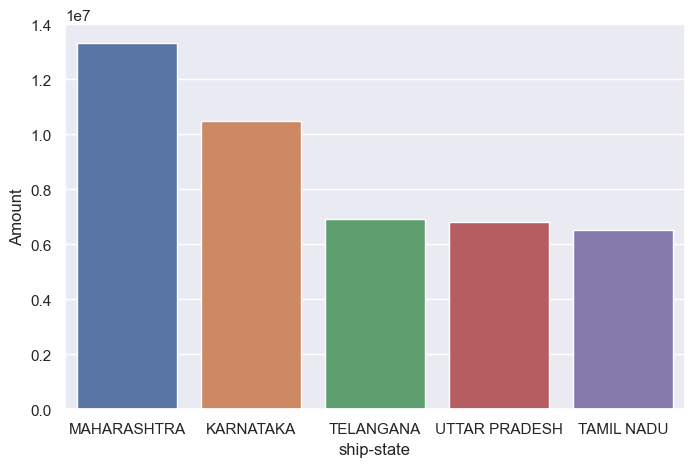

In [172]:
sns.set(rc={'figure.figsize':(8,5)})
b1=df.groupby(['ship-state'],as_index=False).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(5)
c=sns.barplot(x='ship-state',y='Amount',data=b1)


From the above we can infer that most of the  revenue is generated by (Maharashtra,karnataka,telangana)state.

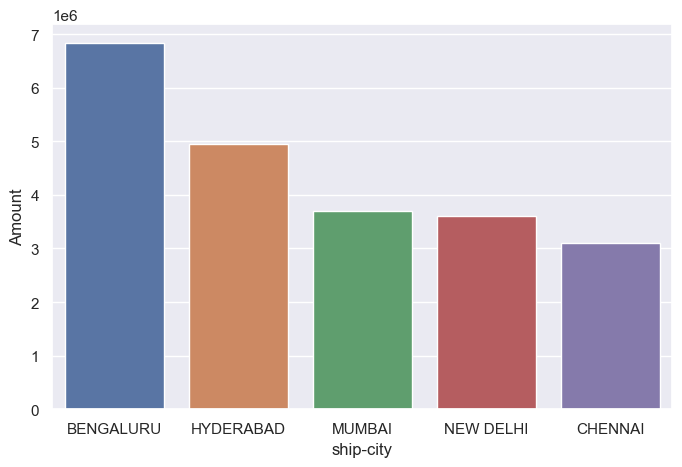

In [175]:
b2=df.groupby(['ship-city'],as_index=False).agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False).head(5)
c=sns.barplot(x='ship-city',y='Amount',data=b2)

From the above we can infer that most revenue is generated by (Bengaluru,Hyderabad,Mumbai)city.

From this data we can conclude that most people are buying T-shirt and from Maharasthra,Karnataka,Telangana,state and mainly serve retailers order through Amazon and the preference is M-size amoung the buyers.